<a href="https://colab.research.google.com/github/YajaGen/Tiendas-Alura/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
import pandas as pd

def calcular_ingresos(lista_tiendas):
    """
    Combina una lista de DataFrames y calcula el ingreso total por tienda,
    ordenándolo de mayor a menor.

    Parámetros:
    -----------
    lista_tiendas : list
        Lista de DataFrames que contienen las columnas "Lugar de Compra" y "Precio".

    Retorna:
    --------
    df_ingresos : DataFrame
        DataFrame con dos columnas: "Lugar de Compra" y "Ingreso Total".
        Los ingresos se formatean con separadores de miles y dos decimales,
        y se muestran en orden descendente (los ingresos más altos primero).
    """
    # Combinar los DataFrames en uno solo
    df_combined = pd.concat(lista_tiendas, ignore_index=True)

    # Agrupar por "Lugar de Compra" y sumar la columna "Precio"
    ingresos_por_tienda = df_combined.groupby("Lugar de Compra")["Precio"].sum()

    # Ordenar de mayor a menor (ascending=False)
    ingresos_por_tienda = ingresos_por_tienda.sort_values(ascending=False)

    # Convertir la Serie resultante en un DataFrame y renombrar las columnas
    df_ingresos = ingresos_por_tienda.reset_index()
    df_ingresos.columns = ["Lugar de Compra", "Ingreso Total"]

    # Formatear los valores de "Ingreso Total" para mejorar la legibilidad
    df_ingresos["Ingreso Total"] = df_ingresos["Ingreso Total"].map('{:,.2f}'.format)

    return df_ingresos

# Ejemplo de uso:
lista_tiendas = [tienda, tienda2, tienda3, tienda4]
df_ingresos = calcular_ingresos(lista_tiendas)
print(df_ingresos)

   Lugar de Compra     Ingreso Total
0           Bogotá  1,814,858,300.00
1         Medellín  1,096,669,200.00
2             Cali    506,526,100.00
3          Pereira    225,927,300.00
4     Barranquilla    132,040,500.00
5        Cartagena    102,376,700.00
6           Cúcuta     99,369,100.00
7      Bucaramanga     90,573,300.00
8         Riohacha     73,879,700.00
9          Leticia     67,149,900.00
10     Santa Marta     53,100,500.00
11           Pasto     49,014,300.00
12           Neiva     20,898,000.00
13       Manizales     19,367,900.00
14   Villavicencio     13,333,600.00
15          Soacha     12,317,700.00
16         Armenia     12,242,900.00
17         Inírida      8,087,900.00
18      Valledupar      5,886,300.00


# 2. Ventas por categoría

In [ ]:
import pandas as pd

def ventas_por_categoria(df_combined):
    """
    Calcula las ventas totales por categoría y lugar de compra.

    Parámetros:
    -----------
    df_combined : DataFrame
        DataFrame combinado con al menos las columnas "Lugar de Compra" y "Categoría del Producto".

    Retorna:
    --------
    df_categorias : DataFrame
        DataFrame con las ventas totales por categoría en cada lugar de compra.
    """
    try:
        # Verificar si las columnas necesarias existen
        if not {"Lugar de Compra", "Categoría del Producto"}.issubset(df_combined.columns):
            raise ValueError("Las columnas 'Lugar de Compra' y 'Categoría del Producto' son obligatorias.")

        # Agrupar por Lugar de Compra y Categoría del Producto
        ventas_agrupadas = df_combined.groupby(["Lugar de Compra", "Categoría del Producto"]).size()

        # Convertir el resultado en un DataFrame organizado
        df_categorias = ventas_agrupadas.reset_index()
        df_categorias.columns = ["Lugar de Compra", "Categoría del Producto", "Cantidad Vendida"]

        # Ordenar el DataFrame por cantidad vendida de mayor a menor
        df_categorias = df_categorias.sort_values(by="Cantidad Vendida", ascending=False)

        return df_categorias

    except Exception as e:
        print(f"Error en el análisis: {e}")
        return pd.DataFrame()

# Ejemplo de uso:
# Supongamos que ya combinaste los DataFrames de las tiendas en "df_combined"
# df_combined debe contener las columnas "Lugar de Compra" y "Categoría del Producto"
# Creating df_combined by concatenating the individual store dataframes
df_combined = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
df_categorias = ventas_por_categoria(df_combined)

# Mostrar la salida
if not df_categorias.empty:
    print(df_categorias)
else:
    print("No se encontraron resultados para analizar.")

    Lugar de Compra   Categoría del Producto  Cantidad Vendida
23           Bogotá                  Muebles               767
19           Bogotá             Electrónicos               709
21           Bogotá                 Juguetes               553
18           Bogotá        Electrodomésticos               498
17           Bogotá     Deportes y diversión               485
..              ...                      ...               ...
134      Valledupar             Electrónicos                 1
137      Valledupar                   Libros                 1
135      Valledupar   Instrumentos musicales                 1
139   Villavicencio  Artículos para el hogar                 1
145   Villavicencio                   Libros                 1

[147 rows x 3 columns]


# 3. Calificación promedio de la tienda


In [ ]:

def combinar_dataframes(lista_tiendas):

    #Combina una lista de DataFrames en uno solo.

    return pd.concat(lista_tiendas, ignore_index=True)


def calcular_valoracion_promedio(df_combined):

    #Calcula la valoración promedio por tienda.

    return df_combined.groupby("Lugar de Compra")["Calificación"].mean()


def formatear_valoracion_promedio(valoraciones):

    #Convierte las valoraciones promedio en un DataFrame organizado.

    df_valoraciones = valoraciones.reset_index()
    df_valoraciones.columns = ["Lugar de Compra", "Valoración Media"]
    return df_valoraciones


# Lista de DataFrames
lista_tiendas = [tienda, tienda2, tienda3, tienda4]


# Paso 1: Combinar los DataFrames
df_combined = combinar_dataframes(lista_tiendas)

# Paso 2: Calcular la valoración promedio
valoraciones_promedio = calcular_valoracion_promedio(df_combined)

# Paso 3: Organizar los resultados
df_valoraciones = formatear_valoracion_promedio(valoraciones_promedio)

# Imprimir los resultados finales
print(df_valoraciones)

   Lugar de Compra  Valoración Media
0          Armenia          3.464286
1     Barranquilla          3.803226
2           Bogotá          4.113619
3      Bucaramanga          3.977901
4             Cali          4.046673
5        Cartagena          4.020661
6           Cúcuta          3.940860
7          Inírida          3.642857
8          Leticia          3.922535
9        Manizales          3.634146
10        Medellín          3.926534
11           Neiva          3.800000
12           Pasto          4.148936
13         Pereira          4.013540
14        Riohacha          3.895706
15     Santa Marta          3.596026
16          Soacha          3.894737
17      Valledupar          4.071429
18   Villavicencio          3.827586


# 4. Productos más y menos vendidos

In [ ]:
import pandas as pd

def productos_mas_y_menos_vendidos(df_combined):
    """
    Identifica los productos más vendidos y menos vendidos.

    Parámetros:
    -----------
    df_combined : DataFrame
        DataFrame combinado que contiene al menos la columna "Producto".

    Retorna:
    --------
    df_productos_ordenados : DataFrame
        DataFrame con los productos ordenados por cantidad de ventas (de mayor a menor).
    """
    try:
        # Validar que el DataFrame no esté vacío
        if df_combined.empty:
            raise ValueError("El DataFrame proporcionado está vacío. No hay datos para analizar.")

        # Validar que la columna "Producto" exista
        if "Producto" not in df_combined.columns:
            raise ValueError("El DataFrame no contiene una columna llamada 'Producto'.")

        # Agrupar por "Producto" y calcular el número de ventas
        ventas_por_producto = df_combined.groupby("Producto").size()

        # Convertir el resultado en un DataFrame organizado
        df_productos = ventas_por_producto.reset_index()
        df_productos.columns = ["Producto", "Cantidad Vendida"]

        # Ordenar los productos por cantidad vendida de mayor a menor
        df_productos_ordenados = df_productos.sort_values(by="Cantidad Vendida", ascending=False)

        return df_productos_ordenados

    except Exception as e:
        print(f"Error en el análisis: {e}")
        return pd.DataFrame()

# Ejemplo de uso:
# Verifica que el DataFrame combinado esté correctamente cargado con la columna "Producto"
df_productos_ordenados = productos_mas_y_menos_vendidos(df_combined)

# Mostrar la salida
if not df_productos_ordenados.empty:
    print(df_productos_ordenados)
else:
    print("No se generó ningún resultado. Revisa la estructura de tus datos.")

                       Producto  Cantidad Vendida
32                Mesa de noche               210
33                   Microondas               206
12    Carrito de control remoto               206
7                       Batería               203
11                    Cama king               201
35          Modelado predictivo               200
40             Secadora de ropa               200
41                 Set de ollas               200
10                     Cama box               199
9       Bloques de construcción               199
25                    Iphone 15               198
1                       Armario               197
38                    Pandereta               197
5           Balón de baloncesto               197
8                     Bicicleta               196
24    Iniciando en programación               195
45                     Smart TV               192
39                 Refrigerador               191
15                   Cubertería               189


In [ ]:
def generar_top_5_productos_por_tienda(df_combined):
    """
    Genera un informe con los 5 productos más vendidos y menos vendidos por tienda.

    Parámetros:
    -----------
    df_combined : DataFrame
        DataFrame combinado que contiene las columnas "Lugar de Compra" y "Producto".

    Retorna:
    --------
    None
    """
    # Limpiar espacios y caracteres invisibles en las columnas clave
    df_combined["Lugar de Compra"] = df_combined["Lugar de Compra"].str.strip()
    df_combined["Producto"] = df_combined["Producto"].str.strip()

    # Obtener todas las tiendas únicas
    tiendas_unicas = df_combined["Lugar de Compra"].unique()

    # Generar informe para cada tienda
    for tienda in tiendas_unicas:
        print(f"\n*** Top 5 productos para la tienda: {tienda} ***")

        # Filtrar datos para la tienda actual
        df_tienda = df_combined[df_combined["Lugar de Compra"] == tienda]

        # Agrupar por producto y calcular la cantidad vendida
        ventas_por_producto = df_tienda.groupby("Producto").size()

        # Convertir a DataFrame y ordenar
        df_productos = ventas_por_producto.reset_index()
        df_productos.columns = ["Producto", "Cantidad Vendida"]
        df_productos_ordenados = df_productos.sort_values(by="Cantidad Vendida", ascending=False)

        # Obtener los top 5 productos más vendidos y menos vendidos
        productos_top = df_productos_ordenados.head(5)
        productos_bottom = df_productos_ordenados.tail(5)

        # Mostrar los resultados
        print("\nProductos Más Vendidos:")
        for i, row in productos_top.iterrows():
            print(f"- {row['Producto']}: {row['Cantidad Vendida']} unidades")

        print("\nProductos Menos Vendidos:")
        for i, row in productos_bottom.iterrows():
            print(f"- {row['Producto']}: {row['Cantidad Vendida']} unidades")

In [ ]:
generar_top_5_productos_por_tienda(df_combined)


*** Top 5 productos para la tienda: Bogotá ***

Productos Más Vendidos:
- Carrito de control remoto: 104 unidades
- Vaso térmico: 98 unidades
- Bloques de construcción: 89 unidades
- Mesa de noche: 89 unidades
- Microondas: 89 unidades

Productos Menos Vendidos:
- Muñeca bebé: 64 unidades
- Tablet ABXY: 62 unidades
- Ciencia de datos con Python: 61 unidades
- Mochila: 61 unidades
- Auriculares con micrófono: 57 unidades

*** Top 5 productos para la tienda: Medellín ***

Productos Más Vendidos:
- Set de ollas: 59 unidades
- Armario: 57 unidades
- Pandereta: 55 unidades
- Modelado predictivo: 54 unidades
- Batería: 53 unidades

Productos Menos Vendidos:
- Asistente virtual: 37 unidades
- Cubertería: 37 unidades
- Vaso térmico: 36 unidades
- Celular ABXY: 35 unidades
- Balón de baloncesto: 35 unidades

*** Top 5 productos para la tienda: Cartagena ***

Productos Más Vendidos:
- Cubo mágico 8x8: 9 unidades
- Silla de oficina: 9 unidades
- Cubertería: 8 unidades
- Muñeca bebé: 8 unidades
-

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def generar_barras_apiladas_tiendas(df_combined, top_n=5):
    """
    Genera gráficos de barras apiladas para comparar los productos más vendidos y menos vendidos en las tiendas.

    Parámetros:
    -----------
    df_combined : DataFrame
        DataFrame combinado que contiene las columnas "Lugar de Compra" y "Producto".
    top_n : int
        Número de productos más vendidos y menos vendidos a incluir en las barras apiladas.

    Retorna:
    --------
    None
    """
    # Limpiar espacios y caracteres invisibles en las columnas clave
    df_combined["Lugar de Compra"] = df_combined["Lugar de Compra"].str.strip()
    df_combined["Producto"] = df_combined["Producto"].str.strip()

    # Agrupar datos por tienda y producto
    ventas_por_tienda_producto = df_combined.groupby(["Lugar de Compra", "Producto"]).size().unstack(fill_value=0)

    # Seleccionar productos más vendidos por cantidad total
    total_ventas_producto = ventas_por_tienda_producto.sum(axis=0).sort_values(ascending=False)
    productos_seleccionados = total_ventas_producto.head(top_n).index.tolist()

    # Filtrar para productos seleccionados
    ventas_filtradas = ventas_por_tienda_producto[productos_seleccionados]

    # Crear gráfico de barras apiladas
    ventas_filtradas.plot(kind="bar", stacked=True, figsize=(14, 8), cmap="tab10")
    plt.title("Comparación de Ventas: Productos Más Vendidos por Tienda", fontsize=16)
    plt.xlabel("Lugar de Compra", fontsize=12)
    plt.ylabel("Cantidad Vendida", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Producto", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
    plt.tight_layout()
    plt.show()

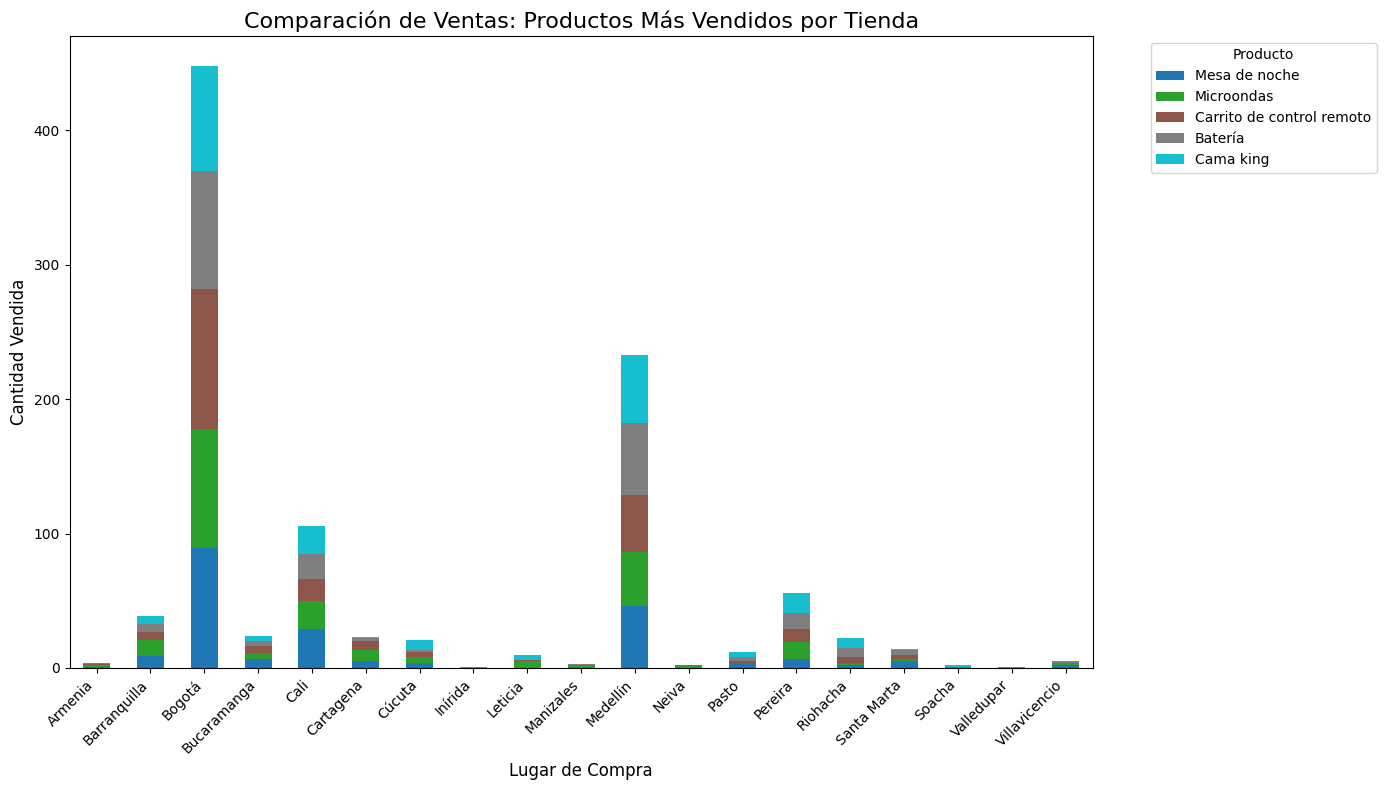

In [ ]:
generar_barras_apiladas_tiendas(df_combined, top_n=5)

# 5. Envío promedio por tienda

In [ ]:
def calcular_envio_promedio_por_tienda_cop(df_combined):
    """
    Calcula el costo de envío promedio para cada tienda y muestra los valores en pesos colombianos (COP).

    Parámetros:
    -----------
    df_combined : DataFrame
        DataFrame que contiene las columnas "Lugar de Compra" y "Costo de envío".

    Retorna:
    --------
    df_envio_promedio : DataFrame
        DataFrame con el costo de envío promedio por tienda en formato de pesos colombianos.
    """
    # Validar que las columnas necesarias existan
    if not {"Lugar de Compra", "Costo de envío"}.issubset(df_combined.columns):
        raise ValueError("El DataFrame no contiene las columnas necesarias: 'Lugar de Compra' y 'Costo de envío'.")

    # Agrupar por tienda y calcular el costo de envío promedio
    envio_promedio_por_tienda = df_combined.groupby("Lugar de Compra")["Costo de envío"].mean()

    # Convertir el resultado en un DataFrame organizado
    df_envio_promedio = envio_promedio_por_tienda.reset_index()
    df_envio_promedio.columns = ["Lugar de Compra", "Costo de Envío Promedio"]

    # Ordenar las tiendas por costo de envío promedio de mayor a menor
    df_envio_promedio = df_envio_promedio.sort_values(by="Costo de Envío Promedio", ascending=False)

    # Formatear los valores como pesos colombianos
    df_envio_promedio["Costo de Envío Promedio"] = df_envio_promedio["Costo de Envío Promedio"].apply(lambda x: f"${x:,.0f} COP")

    return df_envio_promedio

# Ejemplo de uso:
envio_promedio_por_tienda_cop = calcular_envio_promedio_por_tienda_cop(df_combined)

# Mostrar los resultados
print("*** Costo de envío promedio por tienda en pesos colombianos ***")
print(envio_promedio_por_tienda_cop)

*** Costo de envío promedio por tienda en pesos colombianos ***
   Lugar de Compra Costo de Envío Promedio
16          Soacha             $34,768 COP
7          Inírida             $30,557 COP
6           Cúcuta             $28,597 COP
12           Pasto             $27,801 COP
11           Neiva             $27,710 COP
3      Bucaramanga             $26,790 COP
4             Cali             $26,727 COP
8          Leticia             $25,318 COP
10        Medellín             $25,282 COP
18   Villavicencio             $25,100 COP
9        Manizales             $24,949 COP
2           Bogotá             $24,532 COP
14        Riohacha             $24,128 COP
13         Pereira             $23,211 COP
0          Armenia             $22,868 COP
1     Barranquilla             $22,692 COP
5        Cartagena             $22,638 COP
17      Valledupar             $22,021 COP
15     Santa Marta             $18,752 COP


## **Dashboard**

In [ ]:
def generar_barras_agrupadas(df_combined):
    """
    Genera gráficos de barras agrupadas para comparar los ingresos por categoría de productos en cada tienda.

    Parámetros:
    -----------
    df_combined : DataFrame
        DataFrame combinado que contiene las columnas "Lugar de Compra", "Categoría del Producto" y "Precio".

    Retorna:
    --------
    None
    """
    # Validar que las columnas necesarias existan
    if not {"Lugar de Compra", "Categoría del Producto", "Precio"}.issubset(df_combined.columns):
        raise ValueError("El DataFrame no contiene las columnas necesarias: 'Lugar de Compra', 'Categoría del Producto' y 'Precio'.")

    # Agrupar por tienda y categoría, calculando los ingresos totales
    ingresos_por_tienda_categoria = df_combined.groupby(["Lugar de Compra", "Categoría del Producto"])["Precio"].sum().unstack(fill_value=0)

    # Crear gráfico de barras agrupadas
    ingresos_por_tienda_categoria.plot(kind="bar", figsize=(14, 8), width=0.8, cmap="tab10")
    plt.title("Ingresos Totales por Categoría y Tienda", fontsize=16)
    plt.xlabel("Lugar de Compra", fontsize=12)
    plt.ylabel("Ingresos Totales (COP)", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Categoría del Producto", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
    plt.tight_layout()
    plt.show()

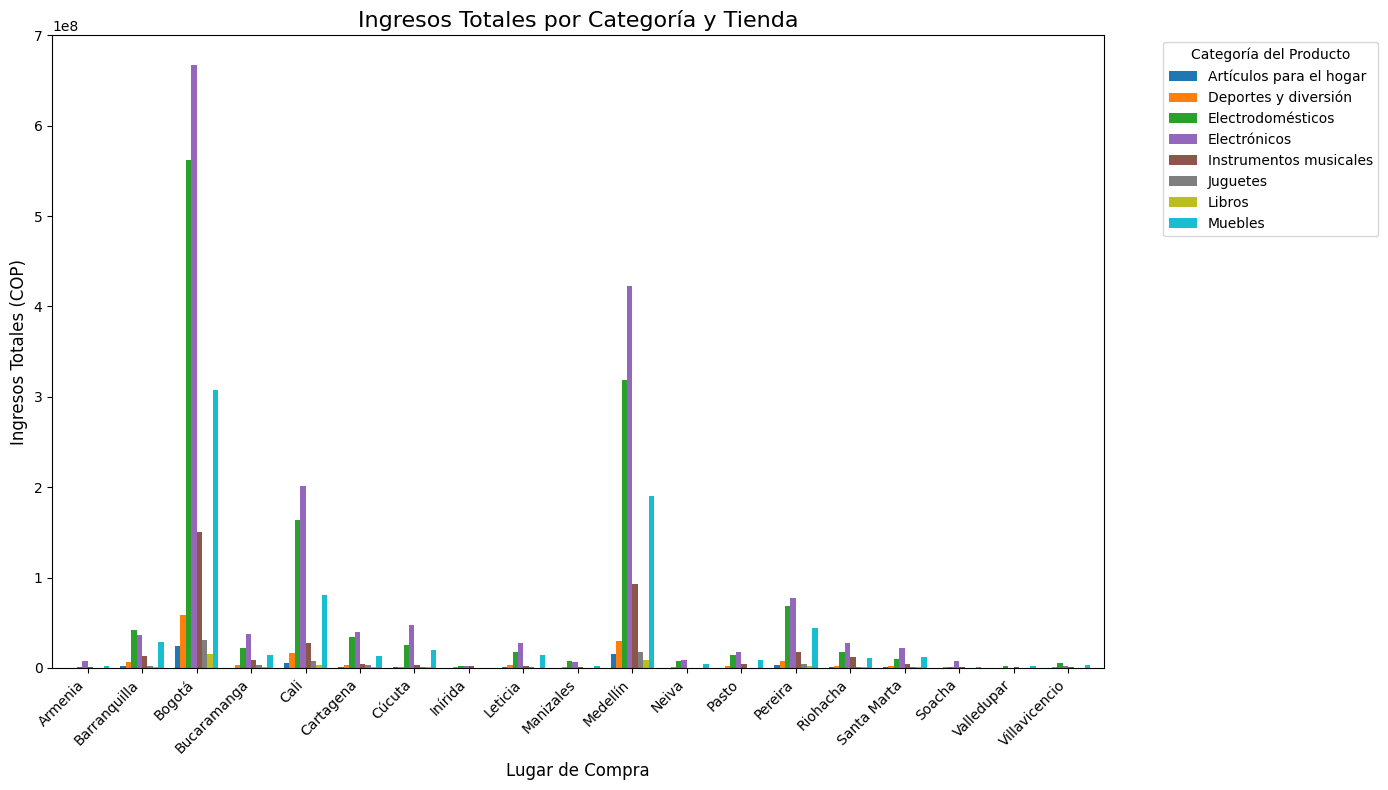

In [ ]:
generar_barras_agrupadas(df_combined)